# Projet  de Machine Learning en Python - Strat√©gie de Trading, NLP et Twitter

## Date : 06/02/2021
*Groupe : L√©o PIACENTINO, Olivier NGO, Hugo MOREL*

*** 

## `Sujet :`
√âtant tous les trois int√©ress√©s par le monde de la finance, nous voulions r√©aliser un projet de Machine Learning appliqu√© √† ce domaine. Nous avons donc choisi de traiter un sujet de finance de march√© se servant du **Natural Language Processing** comme projet. Ainsi, nous avons d√©cid√© d'essayer de cr√©er une strat√©gie de trading profitable sur le Bitcoin en se servant du "Sentiment Analysis". Apr√®s m√ªre r√©flexion, se focaliser sur l'impact de **Twitter** sur le **cours du Bitcoin** semblait √™tre le sujet le plus pertinent. En effet, nous supposons qu'il existe un lien entre la source d'information (tant officielle que parall√®le) qu'est Twitter et le cours du Bitcoin. 

**Probl√©matique : Est-il possible et viable d'analyser et d'interpr√©ter des informations textuelles li√©es au Bitcoin, dans le but d'en d√©duire une position d'investissement √† court/moyen-terme ?**

Pour r√©pondre √† notre probl√©matique, nous nous sommes concentr√©s sur une analyse du **Bitcoin** par l'interm√©diaire de deux sources d'information :

* son prix du 17-08-2017 jusqu'√† aujourd'hui 02-02-2021
* la publication d'informations relatives au Bitcoin (Tweeter)


Les prix ont √©t√© r√©colt√©s avec **l'API Binance**, les informations relatives au Bitcoin ont √©t√© obtenues depuis les Tweets de personnes et entreprises consid√©r√©es comme influentes dans le milieu de la cryptomonnaie avec **l'API Twitter**. Les personnes en question sont par exemple le cr√©ateur de l'Ethereum, des "crypto-trader" suivis par centaines de milliers ou encore les cr√©ateurs des "exchanges" et "brokers". 

*** 

## `Plan du projet :`

#### 1) Cr√©ation des bases de donn√©es
* R√©cup√©ration des Tweets avec **l'API Twitter**
* R√©cup√©ration du prix du Bitcoin avec **l'API Binance**

#### 2) Data-Cleaning des donn√©es

* Retraitement des Tweets
* Retraitement des prix
* Fusion des bases de donn√©es

#### 3) Data-Visualiation

#### 4) NLP BERT & Hugging Face

#### 5) Backtest

#### 6) Conclusion 

*** 

In [1]:
from datetime import datetime
import pandas as pd

## 1) Cr√©ation des bases de donn√©es

### A) R√©cup√©ration des Tweets avec **l'API de Twitter**

Afin de cr√©er une base de donn√©es coh√©rente, nous avons selectionn√©s 47 comptes Twitter de personnes et entreprises influentes dans le domaine des cryptomonnaies :


    - @Binance            - @Reuters             - @Officialmcafee        - @loomdart
    - @Coinbase           - @CNBC                - @VitalikButerin        - @Sicarious_
    - @Bitstamp           - @BespokeCrypto       - @pmarca                - @Cryptopathic
    - @MarketWatch        - @APompliano          - @rogerkver             - @CryptoHayes
    - @business           - @NickSzabo4          - @ToneVays              - @JihanWu
    - @YahooFinance       - @nic__carter         - @CharlieShrem          - @starkness
    - @TechCrunch         - @CarpeNoctom         - @naval                 - @brian_armstrong
    - @WSJ                - @Melt_Dem            - @tayvano_              - @BarrySilbert
    - @Forbes             - @100TrillionUSD      - @FEhrsam               - @jack
    - @FT                 - @MessariCrypto       - @ErikVoorhees          - @CryptoDonAlt
    - @TheEconomist       - @MartyBent           - @CryptoCobain          - @CryptoCred
    - @nytimes            - @aantonop            - @ThisIsNuse


De plus nous avons choisi de croiser les comptes ci-dessus avec une recherche par mots cl√©s **["Bitcoin", "BTC"]**,
**dans le but d'obtenir des informations portant uniquement sur le Bitcoin.**

Pour commencer, pr√©cisons l'hypoth√®se derri√®re ce choix de comptes qui est un filtre sur l'information du Bitcoin. Nous remarquons qu'il est possible d'appr√©hender le sujet de deux fa√ßons diff√©rentes. Premi√®rement, d'aucuns pourraient vouloir r√©colter toute l'information disponible sous le **#Bitcoin**. Cette premi√®re approche implique une grande quantit√© de donn√©es mais de mauvaise qualit√©. En effet, le sujet du Bitcoin est presque devenu un sujet populaire o√π nombre de boursicoteurs sp√©culent sur son cours. Sous cette condition, les tweets sont g√©n√©ralement mal orthographi√©s, mal exprim√©s, pas assez concis et peu informatifs lorsqu'ils sont pris un √† un (en revanche, il existe certainement un int√©r√™t √† aggr√©ger par f√™netres de temps le sentiment g√©n√©ral, celui de la doxa). L'information r√©cup√©r√©e √† travers cette approche aurait permis d'analyser la fr√©quence et le volume des tweets tout en essayant d'aggr√©ger un "Sentiment Analysis". Une seconde approche, qui est la n√¥tre, est de ne se focaliser que sur les utilisateurs cl√©s, ayant un impact reconnu et notable sur le monde des cryptomonnaies et donc du Bitcoin. En effet, la plus part des investisseurs individuels sp√©culant sur le Bitcoin suivent avec grande attention les messages et conseils prodigu√©s par ces "influenceurs financiers". Ils prennent leurs d√©cisions d'investissement suite √† certains de ces Tweets cl√©s. Notre r√©flexion a donc √©t√© de prendre l'information √† sa racine, au niveau des d√©cideurs de tendances suivi par les investisseurs individuels et donc de d√©gager des signaux forts d'achat ou de vente. Ainsi, notre objectif est donc d'anticiper le mouvement de toute la communaut√© sur le cours en se focalisant sur les personnes qui guident cette communaut√©. 

#### Classe qui r√©cup√®re les Tweets depuis l'API Twitter

In [2]:
from dataclasses import dataclass
from typing import List, Tuple
from tweepy import API # Biblioth√®que de l'API Tweeter
import tweepy as tw 
import pandas as pd
from tqdm import tqdm
import re

@dataclass
class OAuthClient: 
    consumer_key: str = None
    consumer_secret: str = None
    access_token: str = None
    access_token_secret: str = None
    # check des param√®tres pour qu'aucun ne soit None
    def __post_init__(self):
        if len(list(filter(lambda x: x is None or len(x) == 0, self.__dict__.values()))) > 0:
            raise RuntimeError("Missing parameters NoneType or Empty string") # gestion des exceptions

# utiliser pour filtrer la requ√™te via l'API Twitter
@dataclass(frozen=True)
class Pagination:
    user_name: str
    hashtag: List[str]

    @classmethod
    def from_data(cls,
                  user_name: str,
                  hashtags: List[str]):

        if user_name and hashtags and len(user_name) > 0 and len(hashtags):
            return cls(*cls._format(user_name=user_name,
                                    hashtags=hashtags)
                       )
        else:
            raise RuntimeError("user_name is needed as hashtag to create pagination")

    @staticmethod
    def _format(user_name: str,
                hashtags: List[str]):

        return ["@" + user_name, list(str("#" + hashtag).upper() for hashtag in hashtags)]

# retourne la liste des paginations
class PaginationInitiator(Pagination):

    def __new__(cls,
                user_names: List[str],
                hashtags: List[str]
                ) -> List[Pagination]:
        """

        :param user_names:
        :param hashtags:
        :return list of pagination elements for Cursor Generation

        """

        return list(map(lambda x: Pagination.from_data(x, hashtags), user_names))


class CursorCallable(object):
    def __init__(self, cursor: tw.Cursor, pagination: Pagination):
        self._cursor = cursor
        self._pagination = pagination
        
    #/!\ m√©thode cl√©e de la classe permettant de contourner la limite de t√©l√©chargement de l'API
    def __call__(self, *args, **kwargs) -> Tuple[str, List[tw.Status]]: 
        _cursor = tqdm(self._cursor.items(100000)) # Nombre maximum de Tweets √† r√©colter
        return (self._pagination.user_name, list(item for item in _cursor if
                                                 any([substring in item.text.upper() for substring in
                                                      self._pagination.hashtag])))

# retourne la liste des curseurs
class CursorGenerator(object):

    def __new__(cls, api_session: API, pagination_list: List[Pagination]) -> List[CursorCallable]:
        """

        :param api_session:
        :param pagination_list: return a list of cursor to look for item
        """

        return list(
            CursorCallable(
                cursor=tw.Cursor(method=api_session.user_timeline,
                                 screen_name=pagination.user_name,
                                 since="2019-05-01"),
                pagination=pagination
            )
            for
            pagination in pagination_list
        )


class DataBaseBuilder(object):

    def __init__(self, oauth_client: OAuthClient):
        self._df = pd.DataFrame()
        self.tweets_old_df = None
        self._oauth_client = oauth_client
        self._api_session = API()
        self._list_of_status = list()
        DataBaseBuilder.__post_init__(self)

    @property
    def df(self):
        return self._df

    @property
    def api_session(self) -> API:
        return self._api_session

    @property
    def oauth_client(self):
        return self._oauth_client

    def __post_init__(self):
        self._auth()
        return self

    def _auth(self):
        """

        This method will instantiate a new session for REST call on API Twitter
        """
        _auth = tw.OAuthHandler(consumer_key=self._oauth_client.consumer_key,
                                consumer_secret=self._oauth_client.consumer_secret)
        _auth.set_access_token(key=self._oauth_client.access_token,
                               secret=self._oauth_client.access_token_secret)
        self._api_session = tw.API(auth_handler=_auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

    def get_tweets(self, *args):
        return self._read_cursor(*args)

    def to_csv(self):
        self._build_df()
        self.df.to_csv("tweets_df.csv")

    def _build_df(self):
        for tweet in self._list_of_status:
            self._df = self._df.append(pd.DataFrame({'user_name': tweet.user.name,
                                                     'user_followers': tweet.user.followers_count,
                                                     'user_friends': tweet.user.friends_count,
                                                     'user_favourites': tweet.user.favourites_count,
                                                     'user_verified': tweet.user.verified,
                                                     'Date': tweet.created_at,
                                                     'Text': tweet.text,
                                                     'Like' : tweet.favorite_count,
                                                     'source': tweet.source,
                                                     'is_retweet': tweet.retweeted}, index=[0]))
        self._df.reset_index()

    def _read_cursor(self, *args):
        _cursors = CursorGenerator(api_session=self.api_session,
                                   pagination_list=PaginationInitiator(*args))

        _status_dict = dict(tuple((cursor() for cursor in _cursors)))
        self._list_of_status = [x for v in _status_dict.values() for x in v]
        return self



In [3]:
auth_client = OAuthClient(consumer_key="0VwCIq3X9FaBMqmLYmZAkamqK",
                          consumer_secret="bpUPtpdlly6tiY8Oj4AQYqvsVus4DdvfQ7OTmU2WpadQI61XrR",
                          access_token='1349043797003530242-AfZsuSU35jsN5QBw2Dy4TNWusXlD4l',
                          access_token_secret='OP6jVCy6m9yaoqQ8XxEqkKC7dprnE3Uup2Z7DXhnYp4te')
data = DataBaseBuilder(auth_client)

In [4]:
comptes_twitter = ['Binance','Coinbase', 'Bitstamp','MarketWatch','business','YahooFinance','TechCrunch',\
                   'WSJ','Forbes','FT','TheEconomist','nytimes','Reuters','CNBC','BespokeCrypto','APompliano',\
                   'NickSzabo4','nic__carter','CarpeNoctom','Melt_Dem','100TrillionUSD','MessariCrypto',\
                   'MartyBent','aantonop','Officialmcafee','VitalikButerin','pmarca','rogerkver','ToneVays',\
                   'CharlieShrem','naval','tayvano_','FEhrsam','ErikVoorhees','CryptoCobain','ThisIsNuse',\
                   'loomdart','Sicarious_','Cryptopathic','CryptoHayes','JihanWu','starkness','brian_armstrong',\
                   'BarrySilbert','jack','CryptoDonAlt','CryptoCred']

mots_cles = ["Bitcoin", "BTC"]

In [5]:
# Imporation des tweets dans une dataFrame
# tweets = data.get_tweets(comptes_twitter, mots_cles)
tweets = data.get_tweets(comptes_twitter, mots_cles)

3210it [01:06, 48.23it/s]
3211it [01:01, 52.08it/s]
3232it [01:05, 49.59it/s]
3239it [01:02, 52.14it/s]
3229it [01:01, 52.38it/s]
1681it [00:35, 29.04it/s]Rate limit reached. Sleeping for: 548
3226it [10:19,  5.21it/s]
3203it [01:04, 49.67it/s]
3228it [01:02, 51.46it/s]
3241it [01:02, 52.11it/s]
3241it [01:00, 53.33it/s]
3245it [01:00, 53.66it/s]
81it [00:01,  9.72it/s]Rate limit reached. Sleeping for: 556
3222it [10:26,  5.14it/s]
3215it [01:01, 52.60it/s]
3211it [01:01, 51.96it/s]
216it [00:04, 45.91it/s]
3244it [01:02, 52.21it/s]
3147it [01:07, 46.81it/s]
1561it [00:32, 53.99it/s]Rate limit reached. Sleeping for: 547
3235it [10:17,  5.24it/s]
3225it [01:10, 46.00it/s]
3236it [01:05, 49.27it/s]
3213it [01:04, 49.63it/s]
3245it [01:12, 44.84it/s]
3123it [01:16, 40.84it/s]
1it [00:00,  2.63it/s]Rate limit reached. Sleeping for: 517
3221it [09:50,  5.46it/s]
3234it [01:04, 49.83it/s]
3244it [01:03, 50.75it/s]
152it [00:03, 47.20it/s]
3218it [01:07, 47.58it/s]
3226it [01:06, 48.53it/s]
1

In [7]:
# Exportation des tweets sous le format d'un csv
tweets.to_csv()

#### Description du GetTweets

Pour commencer, nous avons d√ª cr√©er en amont (d√®s l'attribution de notre sujet) un compte "Twitter Developper" pour pouvoir obtenir les cl√©s API et les Tokens. Une fois la candidature accept√©e, nous avons pu r√©cup√©rer les Tweets. En revanche, l'API de Twitter Developper permet de recup√©rer uniquement 900 Tweets par 1/4 d'heure, ce qui peut vite devenir contraignant. Le code ci-dessus permet de "by-pass" cette limite en relan√ßant l'instanciation d'une session pour appeler l'API Twitter. De plus, le tour de force de cette structure est de pouvoir combiner une requ√™te sur les noms des utilisateurs ET des hashtags. De base, la biblioth√®que de l'API de Twitter ne permet pas de faire une telle r√™quete, elle permet uniquement de recup√©rer des Tweets par utilisateur OU par hashtag. En revanche, les comptes "Twitter Developper" bloquent compl√®tement l'acc√®s √† plus de 140 caract√®res dans un Tweet. Cela repr√©sente une perte d'information marginale. Nous verrons ci-dessous que la moyenne des Tweets est de 81 caract√®res.

### B) R√©cup√©ration du prix du Bitcoin avec **l'API Binance**

#### Appel de l'API

In [8]:
# Biblioth√®que de l'API Binance
from binance.client import Client

# Fonction qui nous permet de nous identifer √† l'API Binance
def get_api_client():
    # Key API
    api_key = "LOw2owzbpzBvR2qTuIUPKVv5QLKmNieVbU3NwQMUe5iYiYeC7iHsivtE14LBBjn7"
    api_secret = "ABw7TxRsDbyVjURFxyE1P9Bm7TDwO0NqX9maql4VhWaTUbQewYz1g5FXWyBek0Fl"
    
    return Client(api_key=api_key,api_secret=api_secret)

# Fonction qui v√©rifie que les servers de Binance fonctionnent
def check_server_binance():
    client = get_api_client()
    status = client.get_system_status()
    
    if status["status"] == 0:
        print("Server Binance OK !")
        return get_api_client()
    elif status["status"] == 1:
        print("Server Binance maintenance !")
        exit()

#### Cr√©ation, remplissage et exportation de la DataFrame "price_df"

In [12]:
class DownloadPrice(object):
    
    def __init__(self,client):
        # Cr√©ation de notre DataFrame contenant les prix
        self.price_df = pd.DataFrame()
        # Objet d'identification avec l'API
        self.client = client
        # Initialisation des parametres n√©cessaire √† l'API
        self.start_date = "17 Aug, 2017"
        self.symbol_binance = "BTCUSDT"
        
    # Fonction qui load et remplie la DataFrame
    def data_loader_binance(self):
        # Reponse de l'API
        candles = self.client.get_historical_klines(self.symbol_binance, self.client.KLINE_INTERVAL_1HOUR, self.start_date)

        # Remplissage de la DataFrame
        for candle in candles:
            self.price_df = self.price_df.append(pd.DataFrame({ 'Date': datetime.fromtimestamp(candle[0] / 1000),
                                                                'Open': candle[1],
                                                                'High': candle[2],
                                                                'Low': candle[3],
                                                                'Close': candle[4],
                                                                'Volume': candle[5],
                                                                'Close_time': datetime.fromtimestamp(candle[6] / 1000),
                                                                'Asset_volume': candle[7],
                                                                'Trade_number': candle[8]}, index=[0]))
        
    # Exportation
    def to_csv(self):
        self.price_df.to_csv("price_df.csv")

In [13]:
# V√©rification que l'API fonctionne
client = check_server_binance()
# Instanciation de la class
data = DownloadPrice(client)

Server Binance OK !


In [14]:
# T√©l√©chargement des prix du bitcoin
data.data_loader_binance()

In [15]:
# Exportation DataFrame "price_df" sous le format csv
data.to_csv()

#### Format de la DataFrame :

In [16]:
price_df = pd.read_csv("price_df.csv")
price_df.head()

Unnamed: 0                     Date     Open     High      Low    Close  \
0           0  2017-08-17 06:00:00.000  4261.48  4313.62  4261.32  4308.83   
1           0  2017-08-17 07:00:00.000  4308.83  4328.69  4291.37  4315.32   
2           0  2017-08-17 08:00:00.000  4330.29  4345.45  4309.37  4324.35   
3           0  2017-08-17 09:00:00.000  4316.62  4349.99  4287.41  4349.99   
4           0  2017-08-17 10:00:00.000  4333.32  4377.85  4333.32  4360.69   

      Volume               Close_time   Asset_volume  Trade_number  
0  47.181009  2017-08-17 06:59:59.999  202366.138393           171  
1  23.234916  2017-08-17 07:59:59.999  100304.823567           102  
2   7.229691  2017-08-17 08:59:59.999   31282.312670            36  
3   4.443249  2017-08-17 09:59:59.999   19241.058300            25  
4   0.972807  2017-08-17 10:59:59.999    4239.503586            28

In [17]:
print("Shape DataFrame : ",price_df.shape)

Shape DataFrame :  (30330, 10)


In [18]:
print("Prix du {0}, au {1}".format(price_df['Date'][0],price_df['Date'][len(price_df)-1]))

Prix du 2017-08-17 06:00:00.000, au 2021-02-05 15:00:00


## 2) Data-Cleaning des donn√©es

### A) Retraitement des tweets

Une fois les Tweets extraits, nous devons les retraiter afin de les rendre exploitables, **nous supprimons l'ensemble des :**


    - symboles '#'
    - hyperlinks
    - noms d'utilisateurs Twitter
    - emojis
    - r√©p√©titions d'espaces
    - ponctuations
    - mots 'RT' (signifie que c'est un retweet) `
    

In [22]:
import datetime
import numpy as np
class PreprocessingTweets:
    
    def __init__(self):
        self.tweets_df = pd.read_csv("tweets_df.csv")
        
    def remove_pattern(self):
        # Suppression du mot 'RT'
        self.tweets_df['Text'] = self.tweets_df['Text'].str.replace('RT', '')
        # Suppression du symbol '#'
        self.tweets_df['Text'] = self.tweets_df['Text'].str.replace('#', '')
        # Supression des liens internet
        self.tweets_df['Text'] = self.tweets_df['Text'].str.replace('https?:\/\/.*[\r\n]*', '')
        # Suppression des noms d'utilisateurs
        self.tweets_df['Text'] = self.tweets_df['Text'].str.replace('@[\w]*', '')
        # Suppression des emojis
        self.tweets_df['Text'] = self.tweets_df['Text'].str.replace('[^a-zA-Z#]', ' ')
        # Suppression des espaces en trop
        self.tweets_df['Text'] = self.tweets_df['Text'].apply(lambda x: " ".join(x.split()))  
        # Conversion des majuscules en minuscules
        self.tweets_df['Text'] = self.tweets_df['Text'].apply(lambda x: x.lower())
        
        # Suppression des lignes n'ayant plus de text apres le retraitement 
        self.tweets_df['Text'].replace("", np.nan, inplace=True)
        self.tweets_df.dropna(subset=['Text'],inplace=True)
        
        # Suppresion des colonnes, qui ne seront pas utilis√©es par la suite
        self.tweets_df.drop(columns=['Unnamed: 0','is_retweet','user_verified','source'],inplace=True)
        
    def convert_columns(self): # Convertion de la date en Datetime
        self.tweets_df['Date'] = self.tweets_df['Date'].apply(lambda x : pd.Timestamp(x).ceil('60min'))
        
    def to_csv(self):
        self.tweets_df.to_csv("tweets_df.csv")

#### Remarque importante quant √† la temporalit√© des Tweets :

Ici, nous arrondissons les horaires des Tweets √† l'heure sup√©rieure pour √©viter une erreur capitale qui sera d√©taill√©e par la suite car elle est li√©e aux rendements.

In [23]:
# Instanciation de la class
cleaning_tweets = PreprocessingTweets()

In [24]:
# Suppression des √©l√©ments
cleaning_tweets.remove_pattern()

In [25]:
# Convertion de la date sous le format Datetime
cleaning_tweets.convert_columns()

In [26]:
# Exportation Dataframe "tweets_df" sous le format csv
cleaning_tweets.to_csv()

#### Format de la DataFrame "tweets_df" retrait√© :

In [27]:
tweets_df = pd.read_csv("tweets_df.csv")

In [28]:
tweets_df.head()

Unnamed: 0 user_name  user_followers  user_friends  user_favourites  \
0           0   Binance         1602031           382             3316   
1           1   Binance         1602031           382             3316   
2           2   Binance         1602031           382             3316   
3           3   Binance         1602031           382             3316   
4           4   Binance         1602031           382             3316   

                  Date                                               Text  \
0  2021-02-04 23:00:00  it s easier than ever before to trade p p but ...   
1  2021-02-04 21:00:00              we ve made buying bitcoin even easier   
2  2021-02-04 09:00:00  in the current environment of monetary inflati...   
3  2021-02-04 08:00:00                                did it work bitcoin   
4  2021-02-04 03:00:00  if you missed the fireside chat earlier it s s...   

   Like  
0   213  
1   269  
2   412  
3     0  
4     0

In [29]:
print("Shape DataFrame : ",tweets_df.shape)

Shape DataFrame :  (3858, 8)


### B) Retraitement des prix

In [30]:
from sklearn.preprocessing import StandardScaler

class PreprocessingPrice:
    
    def __init__(self):
        self.price_df = pd.read_csv("price_df.csv")
        # Initialisation de scaler pour standardiser la colonne Target
        self.scaler = StandardScaler()
        
    def convert_columns(self):
        # Conversion de la colonne des colonnes ['Close','Open','High','Low','Volume'] en float
        self.price_df['Close'] = self.price_df['Close'].apply(float)
        self.price_df['Open'] = self.price_df['Open'].apply(float)
        self.price_df['High'] = self.price_df['High'].apply(float)
        self.price_df['Low'] = self.price_df['Low'].apply(float)
        self.price_df['Volume'] = self.price_df['Volume'].apply(float)
        
        # Convertion de la date en Datetime
        self.price_df['Date'] = self.price_df['Date'].apply(lambda x : datetime.datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S").replace(minute=0,second=0))
        
        
    def add_target(self):
        # Ajout de la colonne Target
        self.price_df['Target'] = (self.price_df['Close'].shift(-1) - self.price_df['Close']) / self.price_df['Close']
        # Standardisation de la colonne Target
        self.price_df['Target'] = self.scaler.fit_transform(pd.Series(self.price_df['Target']).values.reshape(-1, 1))
        
    def to_csv(self):
        self.price_df.to_csv("price_df.csv")


In [31]:
# Instanciation de la classe
cleaning_price = PreprocessingPrice()

In [32]:
# Conversion des colonnes sous le bon format float ou Datetime
cleaning_price.convert_columns()

In [33]:
# Ajout et normalisation de la colonne Target, correspond √† 'Y'
cleaning_price.add_target()

In [34]:
# Exportation DataFrame "price_df" sous csv
cleaning_price.to_csv()

### C) Fusion des bases de donn√©es

In [35]:
import datetime

In [36]:
class MergeTweetsPrice():
    
    def __init__(self):
        self.tweets_df = pd.read_csv("tweets_df.csv")
        self.price_df = pd.read_csv("price_df.csv")
    
    def merge_data(self):
        # Fusion des base de donn√©es
        self.tweets_price_df = self.tweets_df.merge(self.price_df, how='inner', on='Date')
        self.tweets_price_df.set_index('Date', inplace=True)
        # Suppresion des derni√®res colonnes inutiles
        self.tweets_price_df.drop(columns=['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0.1'],inplace = True)
        
    def to_csv(self):
        self.tweets_price_df.to_csv("tweets_price_df.csv")

In [37]:
# Instanciation de la classe
data = MergeTweetsPrice()

In [38]:
# Fusion des classes
data.merge_data()

In [39]:
# Exportation DataFrame final sous csv
data.to_csv()

### Remarque cl√©e

Il r√©side ici une subtilit√© quant √† la probl√©matique de l'association des rendements aux Tweets. En effet, cette question revient √† se demander "quelle est la persistance de l'information dans le prix ? ". En d'autres termes, il nous faut associer un Tweet en $t$ √† son rendement en $t+\delta t$, o√π $\delta t$ est l'incr√©ment de temps n√©cessaire pour que l'information soit int√©gr√©e dans le prix. C'est exactement ce qui est fait ici. Nous avons choisi $\delta t$ d'une heure. Apr√®s plusieurs essais de diff√©rents "lag", nous avons ce choix de "lag" d'une heure pour nos rendements suite √† la lecture du papier suivant "Fear and Volatility in Digital Assets" by Faizaan Pervaiz, Christopher Goh, Ashley Pennington, Samuel Holt, James West, Shaun Ng, Octobre 2020(https://arxiv.org/abs/2010.15611).

## 3) Data-Visualisation

### Format de la DataFrame final :

In [1]:
df = pd.read_csv("tweets_price_df.csv")
df.head(2)

Date   user_name  user_followers  user_friends  \
0  2021-02-04 23:00:00     Binance         1602031           382   
1  2021-02-04 23:00:00  Marty Bent           45299          2856   

   user_favourites                                               Text  Like  \
0             3316  it s easier than ever before to trade p p but ...   213   
1           105125  having bitcoin advocates like and in positions...     0   

      Open      High       Low    Close      Volume               Close_time  \
0  37643.0  37698.73  36964.03  37240.0  2533.48052  2021-02-04 23:59:59.999   
1  37643.0  37698.73  36964.03  37240.0  2533.48052  2021-02-04 23:59:59.999   

   Asset_volume  Trade_number    Target  
0  9.435982e+07         79029 -0.848392  
1  9.435982e+07         79029 -0.848392

In [41]:
print("Shape DataFrame : ",df.shape)

Shape DataFrame :  (3349, 16)


### R√©partition des tweets sur chaque ann√©e

In [111]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [103]:
value_date = [datetime.datetime.strptime(val, "%Y-%m-%d %H:%M:%S").year for val in df['Date']]

In [104]:
dict_date = dict([(n, value_date.count(n)) for n in set(value_date)])

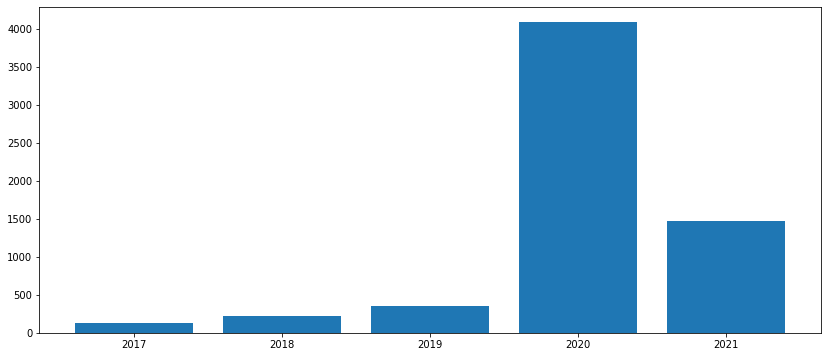

In [116]:
plt.bar(dict_date.keys(), dict_date.values())
plt.rcParams['figure.figsize'] = (14,6)
plt.show()

`Nous remarquons que la majorit√© de nos donn√©es proviennent de l'ann√©e 2020` 

### Nombre de caract√®res moyen par Tweet

In [106]:
nombre_caractere = [len(val) for val in df['Text']]

In [107]:
nombre_caractere_mean = sum(nombre_caractere)/len(nombre_caractere)

In [108]:
print("Nombre de caract√®res moyen par Tweets : {} ".format(int(nombre_caractere_mean)))

Nombre de caract√®res moyen par Tweets : 81 


### Nombre moyen de like par compte

In [109]:
mean_like = df.groupby(['user_name'])['Like'].mean()

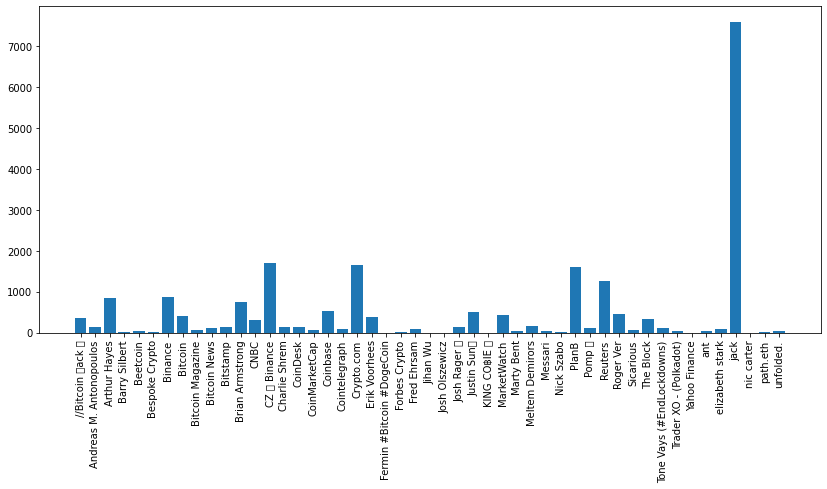

In [115]:
plt.bar(mean_like.index, mean_like)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (14,6)
plt.show()

Nous observons que le compte le plus lik√© est **@jack**. Ceci est int√©ressant dans le mesure o√π ce dernier est le cr√©ateur de Twitter et l'un des plus gros activistes au monde sur le Bitcoin.

### Contenu des 5 Tweets les plus lik√©s

In [117]:
list_max = df.sort_values(['Like']).reset_index()['Text'][-5:]
for i in range(len(list_max)):
    print("Contenu Tweet {0} : {1}\n".format(i+1,list_max.values[i]))

Contenue Tweet 1 : presenting the th anniversary special btc at off on us m allocation no cro staking requir

Contenue Tweet 2 : running bitcoin

Contenue Tweet 3 : happy birthday bitcoin

Contenue Tweet 4 : want to build your btc position at off sept is your chance we ve allocated usd to

Contenue Tweet 5 : donate via bitcoin to help endsars



### Plot Rendements normalis√©s

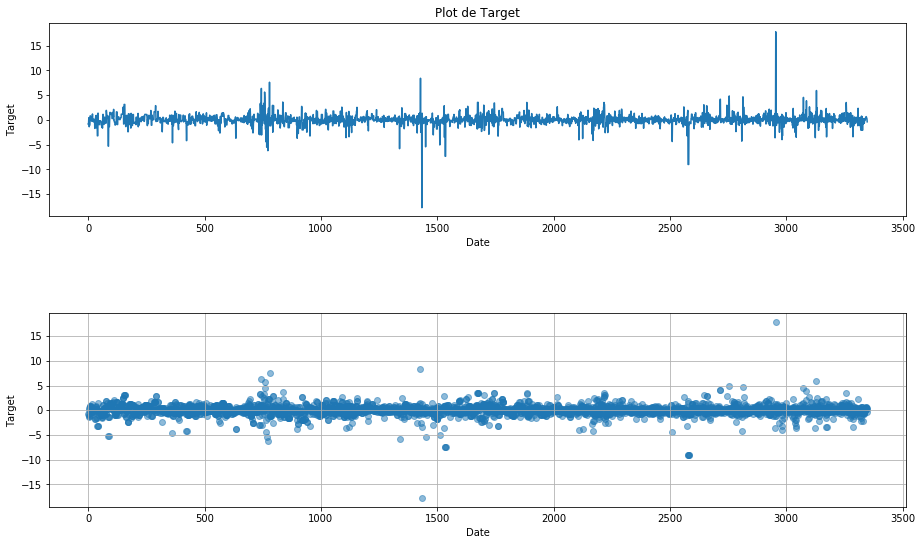

In [17]:
plt.subplot(211)
plt.plot(df['Target'])
plt.title("Plot de Target")
plt.ylabel('Target')
plt.xlabel('Date')

plt.subplot(212)
plt.scatter([i for i in range(len(df))],df['Target'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Target')

plt.grid(True)
plt.rcParams['figure.figsize'] = (14,6)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
plt.show()

## 4) NLP - BERT & Hugging Face

Bri√®vement, notre but ici est d'utiliser un algorithme de `Sentiment Analysis` associ√© √† nos returns standardis√©s. Pour chaque nouveau Tweet, l'algorithme nous retournera un score qui sera une forme de `Sentiment Analysis` ayant appris des rendements qui sont associ√©s √† chaque Tweet. Notre objectif est de trouver des scores relativement √©lev√©s (en valeur absolue), ces derniers seront pour nous nos signaux d'achat ou de vente.

## Attention:

Nous conseillons de lancer la partie 4) sur **Google Colaboratory** pour pouvoir avoir acc√®s √† un GPU pour les calculs qui sont tr√®s importants (le temps de calcul passe de 1h30 √† 4min en passant par un GPU). 

In [ ]:
!pip install transformers
!pip install torch
!pip install sklearn 

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.8MB 5.6MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.9MB 19.7MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 890kB 32.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=6f2b94166c1236346eb8964d53e8bddea5a6105807ec00188810da677a2056ec
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
!pip install transformers
!pip install torch
!pip install sklearn !pip install transformers
!pip install torch
!pip install sklearn 

#### Import des packages et GPU

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import scipy as sc
from transformers import BertModel, BertTokenizerFast, DistilBertForSequenceClassification, DistilBertTokenizerFast
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import ShuffleSplit

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

There are 1 GPU(s) available.
Device name: Tesla K80


In [ ]:
df = pd.read_csv("tweets_price_df.csv") #set directory

#### S√©paration des donn√©es en "train" et en "test"

In [ ]:
# Split our subset into random train and test subsets

import pandas as pd
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(list(df.Text), list(df["Target"]), train_size=.8, shuffle=False)

test = pd.DataFrame(list(zip(val_texts,list(df.Date[round(len(df)*0.8):]))))
test.head()

0                    1
0  we re only email address signups away to have ...  2020-10-24 17:00:00
1  bitcoin trends will firmly establish a don t b...  2020-10-24 17:00:00
2  bitcoin is pumping you want to quit your borin...  2020-10-22 14:00:00
3  thank you for strengthening the world s belief...  2020-10-19 17:00:00
4  the next industrial revolution is being tokeni...  2020-10-19 15:00:00

**Remarque:** Le choix de ne pas shuffle est en ad√©quation avec notre hypoth√®se de la temporalit√© des Tweets. En effet, nous estimons que m√©langer le dataset dans notre cas n'avait pas de sens. De plus, cela aurait cr√©√© des probl√®mes lors de la phase de backtest de la strat√©gie. (Par exemple : si nous avions shuffle, nous aurions certainement backtester des Tweets d√©j√† appris par le mod√®le).

In [ ]:
train= pd.DataFrame(list(zip(train_texts,list(df.Date))))
train.tail()

0                    1
2674  want to listen to a bunch of nerd girls and gu...  2020-11-02 13:00:00
2675  i put some bitcoin cards in my box of hallowee...  2020-11-01 06:00:00
2676  years ago satoshi nakamoto dropped a page bomb...  2020-10-31 17:00:00
2677  so crazy bitcoin will become a digital reserve...  2020-10-29 21:00:00
2678  microstrategy investment on bitcoin is alreay ...  2020-10-27 14:00:00

In [ ]:
train= pd.DataFrame(list(zip(train_texts,list(df.Date))))
train.tail()

#### Impl√©mentation de BERT

Nous allons pr√©parer la base de donn√©es de mani√®re pratique pour le `trainer`  et la `tokeniz√©`:

Nous d√©finissons nos labels dans un object dataset  en  utilisant `torch.utils.data.Dataset` et en impl√©mentant `getitem` et `len`. De cette fa√ßon la donn√©e peut facilement √™tre batch√©e. Ici, nous utilisons `DistilBert` qui est une version optimis√©e de `Bert` (avec moins de poids dans le r√©seau de neurones). De plus, `DistilBert` comme `Bert` contient une s√©mantique et une compr√©hension de la langue anglaise, gr√¢ce au pre-training effectu√© sur le mod√®le, √† partir d'un corpus tr√®s volumineux de texte.
Nous allons utiliser `DistilBert Tokenizer` avant d'entrainer le mod√®le avec `pre-trained DistilBert`. On passe notre test dans le `tokenizer` avec `truncation = true` et `padding = true`. Ceci assure que nos s√©quences aient la m√™me longueur et sont tronqu√©es pour ne pas √™tre plus longues que la longueur maximale de notre mod√®le.

In [ ]:
class DS(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
train_dataset = DS(train_encodings, train_labels)
val_dataset = DS(val_encodings, val_labels)

Ici nous n'avons plus qu'√† cr√©er notre mod√®le √† "fine-tuner", d√©finir notre `TrainingArguments` et instancier notre `Trainer`.

In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=10,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    evaluation_strategy= "epoch"
)

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=1)

trainer = Trainer(
    model=model,                         # the instantiated ü§ó Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)

trainer.train()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

TrainOutput(global_step=1680, training_loss=0.6798344016784713, metrics={'train_runtime': 298.0987, 'train_samples_per_second': 5.636, 'total_flos': 452013437330280, 'epoch': 10.0})

In [ ]:
test = [trainer.predict(DS(tokenizer([text], truncation=True, padding=True), [0])) for text in val_texts] 

### R√©sultats et interpr√©tations :

Les r√©sultats du r√©seau de neurones ne sont pas satisfaisants. En effet, nous pouvons voir (√† travers un Run sur Google Colaboratory) que notre mod√®le est dans un cas typique de sur-apprentissage des donn√©es. En effet, √† chacune des 10 √©poques, on voit que la `Training Loss` diminue mais que notre `Validation Loss` ne diminue pas, voire augmente. Comme cette derni√®re est bien sup√©rieure √† la `Training Loss`, notre mod√®le est bel et bien en train de sur-apprendre. En revanche, le mod√®le semble pouvoir d√©tecter le sentiment li√© √† un Tweet traitant du Bitcoin. On peut m√™me voir une sorte de granularit√© dans l'intensit√© des messages. Malheuresement, il semblerait que les pr√©dictions ne permettent pas de donner des signaux d'achat/vente pertinents. Ce probl√®me est tr√®s certainement la cons√©quence de notre hypoth√®se de base cherchant √† distiller les informations √† travers une requ√™te crois√©e utilisateurs cl√©s et hashtags. Cette hypoth√®se induit une trop faible quantit√© de donn√©es pour permettre au r√©seau d'apprendre correctement. Nous allons tout de m√™me proc√©der au backtest et nous discuterons des solutions √† apporter en conclusion. 

Voici quelques exemples sur certains Tweets pour comprendre comment `DistilBert` entrain√© sur les rendements fonctionne :

In [11]:
test_oneshot = DS(tokenizer(["on bitcoin s th birthday satoshi nakamoto just became the th richest person in the world billion and counting"], truncation=True, padding=True), [0])
trainer.predict(test_oneshot)

PredictionOutput(predictions=array([[0.5800951]], dtype=float32), label_ids=array([0]), metrics={'eval_loss': 0.3365103304386139, 'eval_runtime': 0.0153, 'eval_samples_per_second': 65.439})

Ce Tweet est un exemple type de signal d'achat, et ceci para√Æt logique dans le sens o√π ce Tweet encense le Bitcoin.

In [12]:
test_oneshot = DS(tokenizer(["bitcoin aka crypto is direct activism against an unverifiable and exclusionary financial system which negative"], truncation=True, padding=True), [0])
trainer.predict(test_oneshot)

PredictionOutput(predictions=array([[0.01747653]], dtype=float32), label_ids=array([0]), metrics={'eval_loss': 0.0003054289845749736, 'eval_runtime': 0.0196, 'eval_samples_per_second': 51.017})

Cet exemple est tr√®s int√©ressant car on voit que `DistilBert` reste tr√®s neutre et donc ne nous donne aucune indication quant √† un signal particulier. C'est un exemple typique o√π nous restons neutres sur le march√©, soit en liquidit√©/cash (USDT).

In [35]:
test_oneshot = DS(tokenizer(["I am still bearish on bitcoin"], truncation=True, padding=True), [0])
trainer.predict(test_oneshot)

PredictionOutput(predictions=array([[-0.0162848]], dtype=float32), label_ids=array([0]), metrics={'eval_loss': 0.00026519468519836664, 'eval_runtime': 0.0145, 'eval_samples_per_second': 68.79})

Ici, l'information n'est pas assez cons√©quente pour pouvoir prendre une quelconque d√©cision. Un trop court message n'est pas suffisant pour prendre une d√©cision.

In [39]:
test_oneshot = DS(tokenizer(["i ve never before wished for bitcoin to crash but i hope we do so everyone can fill their bags last time for the"], truncation=True, padding=True), [0])
trainer.predict(test_oneshot)

PredictionOutput(predictions=array([[-0.13995264]], dtype=float32), label_ids=array([0]), metrics={'eval_loss': 0.01958674192428589, 'eval_runtime': 0.0149, 'eval_samples_per_second': 67.073})

Typiquement, nous pourrions nous mettre SHORT suite √† ce Tweet mais il n'a pas assez d'intensit√©.

In [37]:
test_oneshot = DS(tokenizer(["tune in to binance blockchain week to hear from the top contender for bitcoin bull of the year"], truncation=True, padding=True), [0])
trainer.predict(test_oneshot)

PredictionOutput(predictions=array([[0.79102635]], dtype=float32), label_ids=array([0]), metrics={'eval_loss': 0.6257227063179016, 'eval_runtime': 0.0151, 'eval_samples_per_second': 66.373})

En revanche, ce Tweet est un exemple parfait de position LONG sur le Bitcoin.

En synth√®se, ces exemples permettent de voir la granularit√© dont nous parlions pr√©c√©dement, mais certains messages sont interpr√©t√©s comme positifs alors qu'ils ne devraient pas et inversement. De plus, lorsque le mot bitcoin n'apparait pas, l'algorithme retourne un sentiment totalement d√©corr√©l√© du rendement, ce qui semble logique. Nous laissons l'utilisateur essayer d'autres exemples pour s'en appercevoir.

### Discussion et am√©liorations potentielles :

Nous pourrions imaginer une autre mani√®re de scorer les Tweets. Par exemple, nous pourrions nous servir du nombre de likes relatifs d'un compte pour ajuster le score. Nous pourrions aussi donner des poids sp√©cifiques √† chacun des comptes en √©tudiant leurs importances au niveau de leurs posts qui ont √©t√© "re-Tweet". En revanche, ces am√©liorations demandent un travail de recherche approfondi sur la donn√©e du r√©seau social.

Pour une premi√®re approche, nous avons d√©cid√© d'aller droit au but et de conserver un mod√®le relativement simple et explicable, plut√¥t que de m√©langer trop de donn√©es entre elles.

#### R√©cup√©ration des signaux d'investissements

In [ ]:
signal = [test[i][0][0][0] for i in range(len(val_texts))]

#### Quelques statistiques

In [28]:
def Statistiques(variable):
    print("Statistiques :")
    return{
            "Mean": pd.Series(variable).mean(),
            "Max": max(variable),
            "Min": min(variable),
            "Var": np.var(variable),
            "Upper Bound": np.percentile(variable,70),
            "Lower Bound": np.percentile(variable,30)
            }

In [30]:
Statistiques(signal)

Statistiques :


{'Mean': 0.06022692398123965,
 'Max': 2.504241704940796,
 'Min': -1.8835374116897583,
 'Var': 0.1697464427221059,
 'Upper Bound': 0.2611275792121887,
 'Lower Bound': -0.12079136222600935}

#### Convertion des signaux en Dataframe

In [ ]:
signal_df = pd.DataFrame(list(zip(signal,list(df.Date[round(len(df)*0.8):]))), columns=['predict','Date'])
signal_df

predict                 Date
0    0.117567  2020-10-24 17:00:00
1   -0.368265  2020-10-24 17:00:00
2    0.493556  2020-10-22 14:00:00
3    0.632009  2020-10-19 17:00:00
4   -0.187218  2020-10-19 15:00:00
..        ...                  ...
665 -0.184593  2020-02-21 03:00:00
666 -0.040151  2020-02-02 06:00:00
667 -0.252227  2019-08-09 19:00:00
668  0.596832  2019-02-06 07:00:00
669 -0.003898  2019-02-06 00:00:00

[670 rows x 2 columns]

In [ ]:
signal_df.to_csv('Signal_dataframe.csv')

In [ ]:
train_labels_df=pd.DataFrame(train_labels,columns=['Target'])

In [ ]:
train_labels_df.to_csv('Train_labels_dataframe.csv')

## 5) Backtest

### Description de la strat√©gie de Trading

La strat√©gie de trading est simple et conservatrice. Son objectif est de prendre des positions fortes sur le march√© gr√¢ce √† des signaux tr√®s intenses. Nous entendons par intenses des signaux d'achat (Long) qui sont sup√©rieurs √† un quantile √† 70% sur la base de l'√©chantillon observ√© et entrain√© (le train donc). Concernant les signaux de vente √† d√©couvert (Short), on cherche donc des signaux en dessous du quantile √† 30%. Ainsi, lorsque le signal n'est pas assez fort, nous pr√©f√©rons rester en cash (USDT). L'id√©e est de laisser la position ouverte durant une heure (toujours d'apr√®s notre hypoth√®se pr√©cis√©e pr√©c√©demment) et de couper la position (Take-profit). Le raisonnement de cette strat√©gie se base donc sur l'hypoth√®se que les Tweets impactants sont int√©gr√©s dans le prix sous une heure. Pr√©cisons une fois de plus que nous ne cherchons pas √† estimer un rendement mais bel et bien un sens du march√©. Le backtest qui est r√©alis√© ici sera sur une p√©riode d'environ un mois.

In [5]:
data = pd.read_csv("price_df.csv")
prediction = pd.read_csv("Signal_dataframe.csv")
observations = pd.read_csv("Train_labels_dataframe.csv")

In [6]:
# Addition des predictions par heure, pour le cas de plusieurs predictions durant la m√™me heure
prediction = prediction.groupby('Date')['predict'].apply(lambda x: sum(x))

#### Remarque : 
Nous avons d√©cid√© de sommer les signaux (et non pas de les moyenner) pour garder une notion d'intensit√© du signal. Prenons un exemple pour illustrer cette id√©e. Si plusieurs utilisateurs publient des Tweets dans la m√™me heure sur le sujet, cela signifie que l'information est importante.

In [7]:
# on transforme prediction en dataframe
prediction = pd.DataFrame(prediction, columns= ['predict'])
prediction.reset_index(inplace=True)

In [8]:
prediction.head()

Date   predict
0  2020-12-30 19:00:00  0.796467
1  2020-12-30 21:00:00  1.771327
2  2020-12-30 22:00:00  0.087391
3  2020-12-30 23:00:00  1.406058
4  2020-12-31 00:00:00  0.834686

In [9]:
# on r√©cup√®re uniquement les donn√©es des prix a partir de la premi√®re date de pr√©diction
data = data[data['Date'] >= prediction['Date'][0]]

In [10]:
data.head()

Unnamed: 0  Unnamed: 0.1                 Date      Open      High  \
29445       29445             0  2020-12-30 19:00:00  28239.68  28530.00   
29446       29446             0  2020-12-30 20:00:00  28510.86  28900.05   
29447       29447             0  2020-12-30 21:00:00  28776.45  28996.00   
29448       29448             0  2020-12-30 22:00:00  28785.67  28980.00   
29449       29449             0  2020-12-30 23:00:00  28875.21  28903.93   

            Low     Close       Volume               Close_time  Asset_volume  \
29445  28239.68  28510.86  3992.536754  2020-12-30 19:59:59.999  1.133958e+08   
29446  28444.00  28776.46  7242.879514  2020-12-30 20:59:59.999  2.081010e+08   
29447  28603.24  28785.67  4271.327517  2020-12-30 21:59:59.999  1.230356e+08   
29448  28534.70  28875.21  3551.040384  2020-12-30 22:59:59.999  1.022468e+08   
29449  28571.84  28703.88  1915.683224  2020-12-30 23:59:59.999  5.510670e+07   

       Trade_number    Target  
29445         73104  0.944010  
29446        119364  0.020602  
29447         81707  0.307049  
29448         77627 -0.621322  
29449         57210  0.601634

In [11]:
len(data)

885

In [12]:
# on joint les prix et pr√©dictions
data2 = data.merge(prediction,how='left',on='Date')

In [13]:
# on remplace les 'NaN' par des zeros, soit on reste en cash sur la strat√©gie
data2['predict'] = data2['predict'].apply(lambda x: 0 if (str(x) == 'nan') else x)

In [23]:
class BackTrader:
    
    def __init__(self,data,set_cash,quantile):
        self.data = data
        self.set_cash = set_cash
        self.quantile = quantile
        self.observations = observations
        # Set et Initialiser le portefeuille
        self.portfolio = []
        self.portfolio.append(self.set_cash)
        # Set parametres plot
        self.settingP = { 'title'   : 'Portfolio',
                         'xlabel'  : 'Date',
                         'ylabel'  : 'Performance',
                         'figsize' : (14,6),
                         'size'    : '12'           }
        self.settingB = { 'title'   : 'Bitcoin',
                         'xlabel'  : 'Date',
                         'ylabel'  : 'Performance',
                         'figsize' : (14,6),
                         'size'    : '12'           }

 

    def strategy(self):
        # Parcours les pr√©dictions
        for i in range(0,len(self.data)):
            if self.data['predict'][i] >= np.percentile(self.observations['Target'],100-self.quantile):
                gross_return = (self.data['Close'][i+1]/self.data['Close'][i]) - 1
                # Nouvelle performance du portefeuille sur 1H
                new_value_portfolio = self.portfolio[-1]*(1 + gross_return)
                # Ajouter la nouvelle valeur a portfolio
                self.portfolio.append(new_value_portfolio)

 

            elif self.data['predict'][i] <= np.percentile(self.observations['Target'],self.quantile):
                # Gross return sur 1H
                gross_return = (self.data['Close'][i+1]/self.data['Close'][i]) - 1
                # Nouvelle performance du portefeuille sur 1H
                new_value_portfolio = self.portfolio[-1]*(1 - gross_return)
                # Ajouter la nouvelle valeur a portfolio
                self.portfolio.append(new_value_portfolio)
        
            else:
                self.portfolio.append(self.portfolio[-1])
        
        return self.portfolio
    
    def plot_portfolio(self):
        plt.subplot(211)
        plt.title(self.settingP['title'])
        plt.plot(self.portfolio)
        plt.xlabel(self.settingP['xlabel'])
        plt.ylabel(self.settingP['ylabel'])
        plt.grid(True)
        
        
        plt.subplot(212)
        plt.title(self.settingB['title'])
        weight = self.set_cash/self.data['Close'][0]
        plt.plot([val*weight for val in self.data['Close']])
        plt.xlabel(self.settingB['xlabel'])
        plt.ylabel(self.settingB['ylabel'])
        plt.grid(True)
        
        plt.rcParams['figure.figsize'] = self.settingB['figsize']
        plt.rcParams["font.size"]= self.settingB['size']
        plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
        plt.show()

In [24]:
# Instanciation de la class BackTrader(data,Cash initial,quantile)
bt = BackTrader(data2,100000,30)

In [25]:
# Run la strategy backtest√© sur 1 mois
portfolio = bt.strategy()

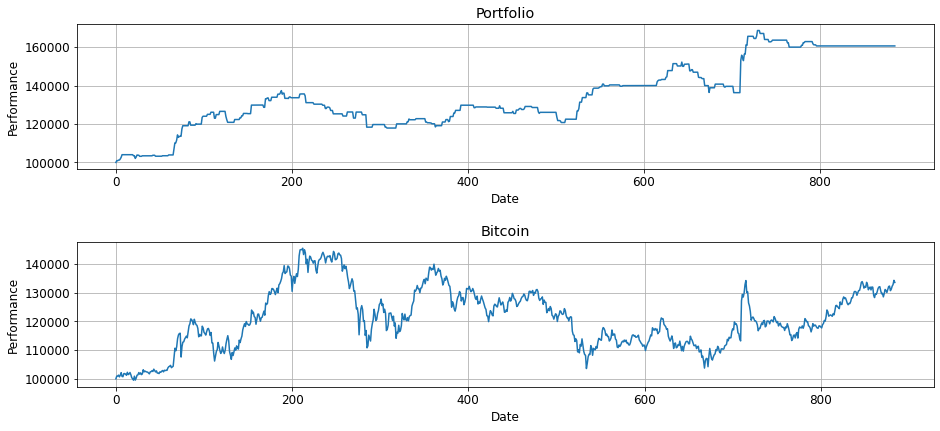

In [26]:
import matplotlib.pyplot as plt
# Plot les resultats
bt.plot_portfolio()

#### Remarque :
Ici, l'√©chelle de temps est la m√™me, nous avons pr√©f√©r√© laisser le nombre de prises de positions sur le march√© pour notre portefeuille au cours du mois backtest√©.

#### Statistiques de la strat√©gie

In [214]:
class PortfolioStatistics:
    
    def __init__(self, portfolio):
        self.portfolio = pd.Series(portfolio)

    def returns(self):
        returns= pd.Series(self.portfolio.shift(-1)/self.portfolio) - 1
        return returns
        
    def mean_return(self):
        mean_return = np.mean(self.returns())
        return mean_return
        
    def period_return(self):
        period_return = self.portfolio[len(self.portfolio)-1]/self.portfolio[0]-1
        return period_return
    
    def volatility(self):
        volatility = np.std(self.returns())* np.sqrt(len(self.portfolio))
        return volatility
    
    def sharpe_ratio(self):
        sharpe_ratio = self.period_return()/self.volatility()
        return sharpe_ratio
    
    def summary_stats(self):
        return {
        "Mean return": self.mean_return(),
        "Period's return": self.period_return(),
        "Volatility": self.volatility(),
        "Sharpe Ratio": self.sharpe_ratio()
        }

In [215]:
ps = PortfolioStatistics(portfolio)
ps.summary_stats()

{'Mean return': 0.002558161385490882,
 "Period's return": 0.6059073041270961,
 'Volatility': 0.22479168006588598,
 'Sharpe Ratio': 2.6954169475912364}

In [216]:
ps = PortfolioStatistics(data2['Close'])
ps.summary_stats()

{'Mean return': 0.00041704078656975804,
 "Period's return": 0.33497165641443294,
 'Volatility': 0.40015693487971066,
 'Sharpe Ratio': 0.8371007152859345}

### R√©sultats et interpr√©tations :

La strat√©gie backtest√©e donne un r√©sultat bien meilleur qu'attendu. Le rendement sur la p√©riode est pr√®s de deux fois sup√©rieur au benchmark qui est le cours du Bitcoin. De plus, la contribution au rendement par unit√© de risque est bien plus large que celle du Bitcoin. En effet, notre strat√©gie a une volatilit√© pr√®s de deux fois inf√©rieure √† celle du Bitcoin. C'est la raison pour laquelle notre ratio de Sharpe est de $2.70$ quand celui du Bitcoin est de $0.83$. Notre strat√©gie reste donc conservatrice et performante. Cette sur-performance r√©side dans le fait que nous soyons majoritairement cash durant la p√©riode de backtest et que nous conservons mieux nos profits r√©alis√©s. C'est pourquoi on peut voir appara√Ætre des paliers sur la courbe de notre backtest. Typiquement, on peut voir qu'aucun signal d'achat ou de vente n'est ressorti ces derniers jours.


## 5) Conclusion

Dans ce devoir nous avons essay√© de mettre en oeuvre et d'appliquer tous les concepts vus dans le cours. En commen√ßant par l'extraction de donn√©es via des API nous avons pu d√©velopper nos comp√©tences sur le sujet. Par la suite, nous avons nettoy√© et pre-process√© les donn√©es de mani√®re √† pouvoir les utiliser avec notre outil de Machine Learning `DistilBert`. Avant de commencer, nous avons parcouru les donn√©es pour comprendre ce que nous avions r√©cup√©r√© et avoir des axes de r√©flexion pour d√©velopper notre projet. Par la suite, nous nous sommes servis de `DistilBert` pour pouvoir faire un Sentiment Analysis des Tweets en fonction des rendements standardis√©s associ√©s. Ceci nous a permis de r√©cup√©rer nos signaux et de pouvoir r√©aliser notre strat√©gie de Trading. Le backtest a bien √©t√© r√©alis√© sur des donn√©es non-entrain√©es que nous avons conserv√©es pour le Test.

Concernant les r√©sultats, nous sommes surpris d'avoir une strat√©gie meilleure que le benchmark. En effet, rappelons que le r√©seau de neurones sur-apprend et que cela aurait pu induire de graves difficult√©s lors de la phase de backtest. Pour autant, cela n'a pas √©t√© le cas et la strat√©gie est performante. De plus, le cours du Bitcoin est sur une tendance haussi√®re donc peut-√™tre que cette performance est attribu√©e √† un march√© favorable. Ici, nous consid√©rons cette performance dans un march√© sans friction. Une critique majeure est que nous ne consid√©rons pas les frais de transactions. Ces derniers sont trop variables d'une plateforme √† l'autre mais √©galement en fonction des montants. 

Pour finir, cette strat√©gie est prometteuse et pourrait se r√©v√©ler efficace. Pour l'am√©liorer, il faudrait plus de donn√©es et peut-√™tre r√©ussir √† cr√©er un score qui prend en compte plus d'informations. Une autre am√©lioration possible serait d'optimiser la p√©riode de temps o√π l'information continue d'impacter le cours pour couper la position et take-profit √† l'instant optimal. 